In [1]:
%matplotlib inline

import itertools
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.score_vars import ScoreVariables
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [4]:
# Baseline
drop_params = [('model', "{u'type': u'reg'}"), ('per_side_count', 5), ('score_var', 'prma_20')]

runB = RunManager('StatArbStrategy', 'run_0100', drop_params=drop_params)

comb = CombinationSearch()
comb.set_selection_criteria('sharpe')
comb.params['training_epochs'] = 20

comb.add_run(runB)

comb.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [07:57<00:00, 24.39s/it]


# Parameter Update

In [20]:
runU = RunManager('StatArbStrategy', 'run_0124')

In [21]:
runU.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,1.087209,0.091378,-999.0
1,data_rank_flag,True,144,0.991409,0.083967,-999.0
2,drop_binaries,False,144,1.062105,0.089879,-999.0
3,drop_binaries,True,144,1.016513,0.085467,-999.0
4,holding_period,3,96,1.077444,0.087825,-999.0
5,holding_period,5,96,1.042513,0.088258,-999.0
6,holding_period,7,96,0.997969,0.086936,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,1.039309,0.087673,-999.0
8,per_side_count,10,144,1.181238,0.087882,-999.0
9,per_side_count,20,144,0.897380,0.087464,-999.0


In [24]:
# Update - No Ranking
drop_params = [('data_rank_flag', True), ('per_side_count', 20)]
runU = RunManager('StatArbStrategy', 'run_0124', drop_params=drop_params)

combU = CombinationSearch()
combU.set_selection_criteria('sharpe')
combU.params['training_epochs'] = 20

combU.add_run(runU)

combU.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [04:29<00:00, 13.06s/it]


In [25]:
t = dt.date(2013, 1, 1)
r1 = comb.best_results_returns.loc[t:]
r2 = combU.best_results_returns.loc[t:]

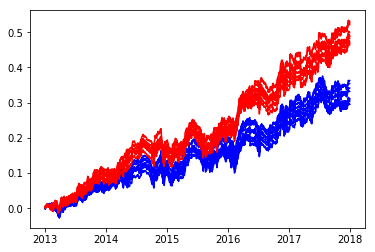

In [26]:
t = dt.date(2013, 1, 1)
r1 = comb.best_results_returns.loc[t:]
r2 = combU.best_results_returns.loc[t:]

plt.figure()
plt.plot(r1.cumsum(), 'b')
plt.plot(r2.cumsum(), 'r')
plt.show()

In [27]:
get_stats(r1).mean(axis=1)

Total               0.32123
Mean                0.00024
Std                 0.00365
Skew               -0.06575
Kurt                1.69800
Sharpe              1.11104
Sortino             1.91603
MinRet             -0.01675
WinP                0.52956
DD%                -0.06116
DDDays            128.00000
UnderwaterDays    160.30000
Underwater%        -0.05608
TimeAtHighs         0.12240
VaR_5perc          -0.00555
CVaR_5perc         -0.00807
LPM_2               0.00600
dtype: float64

In [28]:
get_stats(r2).mean(axis=1)

Total               0.49382
Mean                0.00040
Std                 0.00409
Skew                0.07850
Kurt                2.09100
Sharpe              1.52682
Sortino             2.70857
MinRet             -0.01746
WinP                0.53566
DD%                -0.06734
DDDays            143.40000
UnderwaterDays    145.60000
Underwater%        -0.06640
TimeAtHighs         0.13840
VaR_5perc          -0.00590
CVaR_5perc         -0.00868
LPM_2               0.00704
dtype: float64

In [29]:
# Update - No Ranking
drop_params = [('data_rank_flag', True), ('per_side_count', 20)]
runU = RunManager('StatArbStrategy', 'run_0124', drop_params=drop_params)

combU2 = CombinationSearch()
combU2.set_selection_criteria('mean_min')
combU2.params['training_epochs'] = 20

combU2.add_run(runU)

combU2.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [06:14<00:00, 19.82s/it]


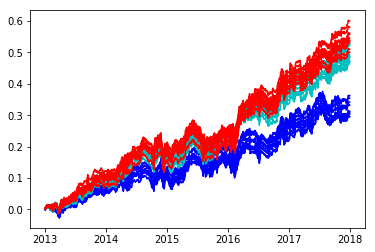

In [30]:
t = dt.date(2013, 1, 1)
r1 = comb.best_results_returns.loc[t:]
r2 = combU.best_results_returns.loc[t:]
r3 = combU2.best_results_returns.loc[t:]

plt.figure()
plt.plot(r1.cumsum(), 'b')
plt.plot(r2.cumsum(), 'c')
plt.plot(r3.cumsum(), 'r')
plt.show()

In [31]:
get_stats(r3).mean(axis=1)

Total               0.54603
Mean                0.00042
Std                 0.00420
Skew                0.05369
Kurt                1.74600
Sharpe              1.63745
Sortino             2.90900
MinRet             -0.01823
WinP                0.55122
DD%                -0.07224
DDDays            158.20000
UnderwaterDays    182.10000
Underwater%        -0.07077
TimeAtHighs         0.15320
VaR_5perc          -0.00614
CVaR_5perc         -0.00886
LPM_2               0.00739
dtype: float64

In [32]:
# Baseline
drop_params = [('model', "{u'type': u'reg'}"), ('per_side_count', 5), ('per_side_count', 20), ('score_var', 'prma_20')]

runB = RunManager('StatArbStrategy', 'run_0100', drop_params=drop_params)

combB2 = CombinationSearch()
combB2.set_selection_criteria('mean_min')
combB2.params['training_epochs'] = 20

combB2.add_run(runB)

combB2.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [07:12<00:00, 23.58s/it]


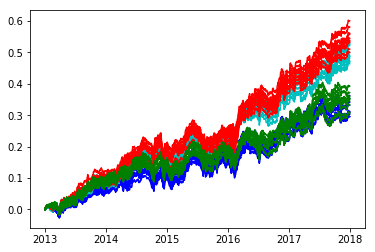

In [35]:
t = dt.date(2013, 1, 1)
r1 = comb.best_results_returns.loc[t:]
r2 = combU.best_results_returns.loc[t:]
r3 = combU2.best_results_returns.loc[t:]
r4 = combB2.best_results_returns.loc[t:]

plt.figure()
plt.plot(r1.cumsum(), 'b')
plt.plot(r2.cumsum(), 'c')
plt.plot(r3.cumsum(), 'r')
plt.plot(r4.cumsum(), 'g')
plt.show()